# Importing Data & Necessary Libraries

In [38]:
# Import necessary libraries
from google.colab import drive
import os

# Mount Google Drive to access files
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [40]:
os.chdir("/content/drive/MyDrive/Colab Notebooks/data file/Programming dataset")
df_loan = pd.read_csv("loan_approval_dataset.csv")
print(f"The shape of the dataset is: {df_loan.shape}")
df_loan.head()

The shape of the dataset is: (4269, 13)


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


# Data Preprocessing

## Data Cleaning

In [41]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [42]:
# Checking for null value -> no null values found
df_loan.isnull().sum()

,0
loan_id,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0


In [43]:
# Checking for duplicates value -> no duplicates found
df_loan.duplicated().sum()

0

In [44]:
# Checking for duplicates in the key value -> no duplicates found
df_loan["loan_id"].duplicated().sum()

0

In [45]:
# Checking for name of the columns & categorical data -> there are trailing spaces.
# Trim the name of columns & the value of categorical data
df_loan.columns = df_loan.columns.str.strip()

cate_col = df_loan.select_dtypes(include=['object']).columns

# Trim whitespace from all categorical columns
for col in cate_col:
    df_loan[col] = df_loan[col].str.strip()

In [46]:
# Checking the data consistency -> there are no problems
for i in df_loan.columns:
    print(f" {i} : {df_loan[i].value_counts()}")

 loan_id : loan_id
1       1
2852    1
2838    1
2839    1
2840    1
       ..
1430    1
1431    1
1432    1
1433    1
4269    1
Name: count, Length: 4269, dtype: int64
 no_of_dependents : no_of_dependents
4    752
3    727
0    712
2    708
1    697
5    673
Name: count, dtype: int64
 education : education
Graduate        2144
Not Graduate    2125
Name: count, dtype: int64
 self_employed : self_employed
Yes    2150
No     2119
Name: count, dtype: int64
 income_annum : income_annum
7000000    62
4100000    59
7600000    57
4700000    56
6900000    55
           ..
3600000    33
3400000    33
9300000    33
8500000    32
6700000    30
Name: count, Length: 98, dtype: int64
 loan_amount : loan_amount
10600000    27
20000000    24
9400000     24
16800000    23
23900000    23
            ..
35800000     1
38500000     1
39500000     1
38800000     1
36100000     1
Name: count, Length: 378, dtype: int64
 loan_term : loan_term
6     490
12    456
4     447
10    436
18    422
16    412
20    4

In [47]:
# Checking the distribution of numeric columns
df_loan.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


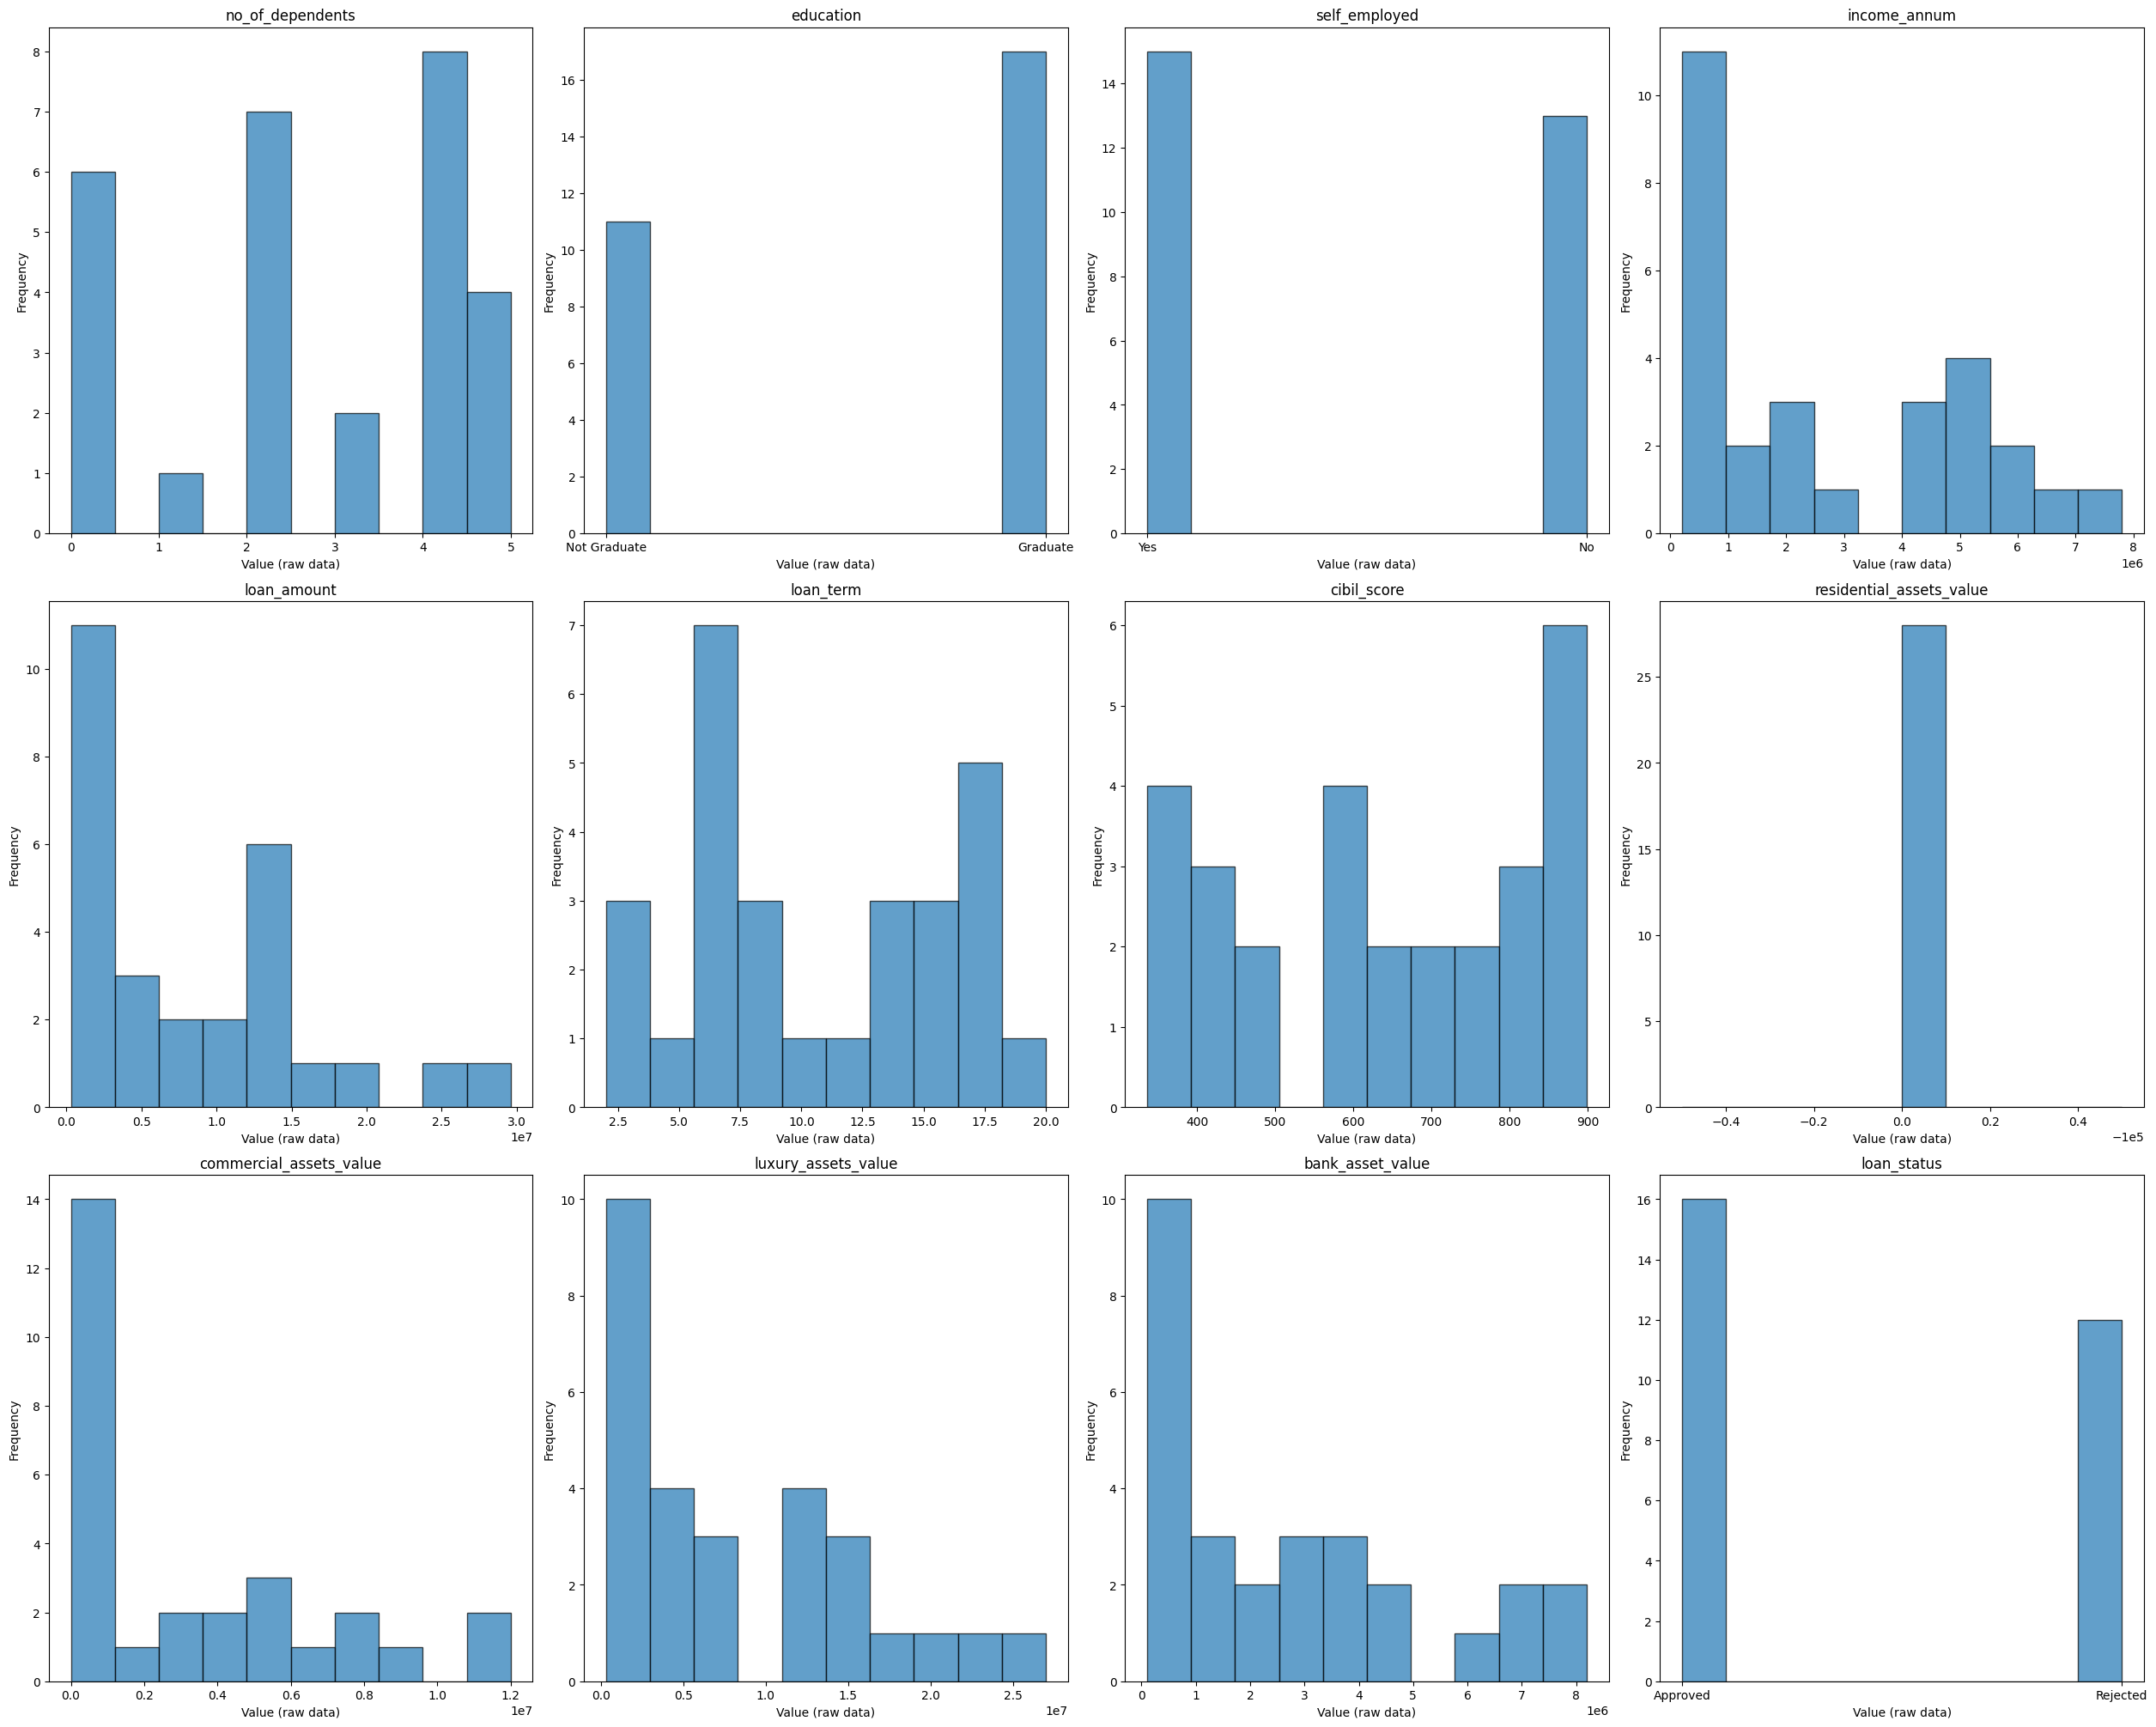

In [48]:
df_test_residential_negative_value = df_loan[df_loan['residential_assets_value'] <0].drop(["loan_id"], axis=1)


fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(25, 20), constrained_layout=True)
axes = axes.flatten()

for i, col in enumerate(df_test_residential_negative_value.columns):
    # Create histograms for every column
    axes[i].hist(df_test_residential_negative_value[col], alpha=0.7, edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_xlabel("Value (raw data)")
    axes[i].set_ylabel("Frequency")

# Show the figure
plt.show()

In [49]:
# Select the column with number data types only
df_loan_numcol = df_loan.select_dtypes(include=np.number).set_index("loan_id")
# Selecting the categorical data
df_loan_catecol = df_loan[["loan_id"] + df_loan.select_dtypes(include="object").columns.tolist()].set_index("loan_id")

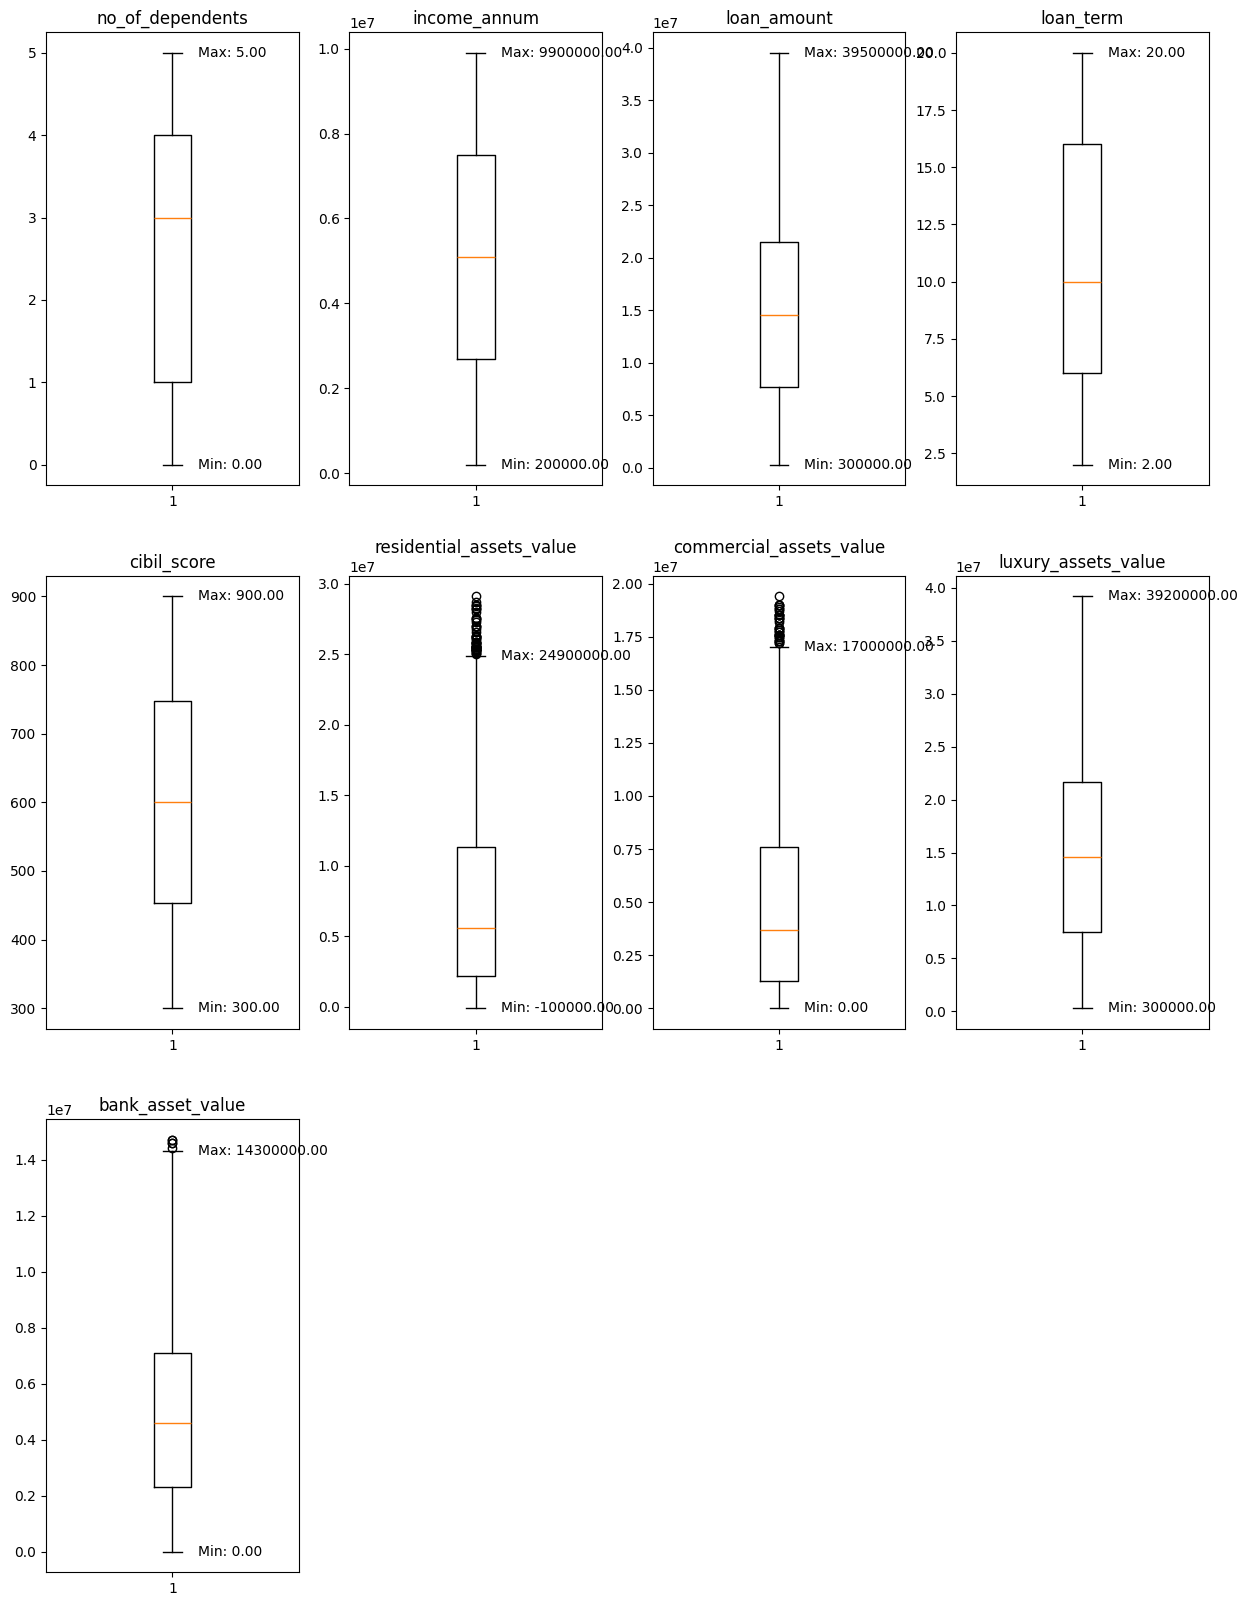

In [50]:
# Generating boxplot for each column:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 20))

for i, col in enumerate(df_loan_numcol.columns):
  bp = axes[i // 4, i % 4].boxplot(df_loan_numcol[col])
  axes[i // 4, i % 4].set_title(col)


  min_whisker = bp['whiskers'][0].get_ydata()[1]
  max_whisker = bp['whiskers'][1].get_ydata()[1]


  axes[i // 4, i % 4].text(1.1, min_whisker, f'Min: {min_whisker:.2f}', va='center')
  axes[i // 4, i % 4].text(1.1, max_whisker, f'Max: {max_whisker:.2f}', va='center')

for i in range(len(df_loan_numcol.columns), 3 * 4):
    row = i // 4
    col = i % 4
    axes[row, col].set_visible(False)
# Show the figure
plt.show()

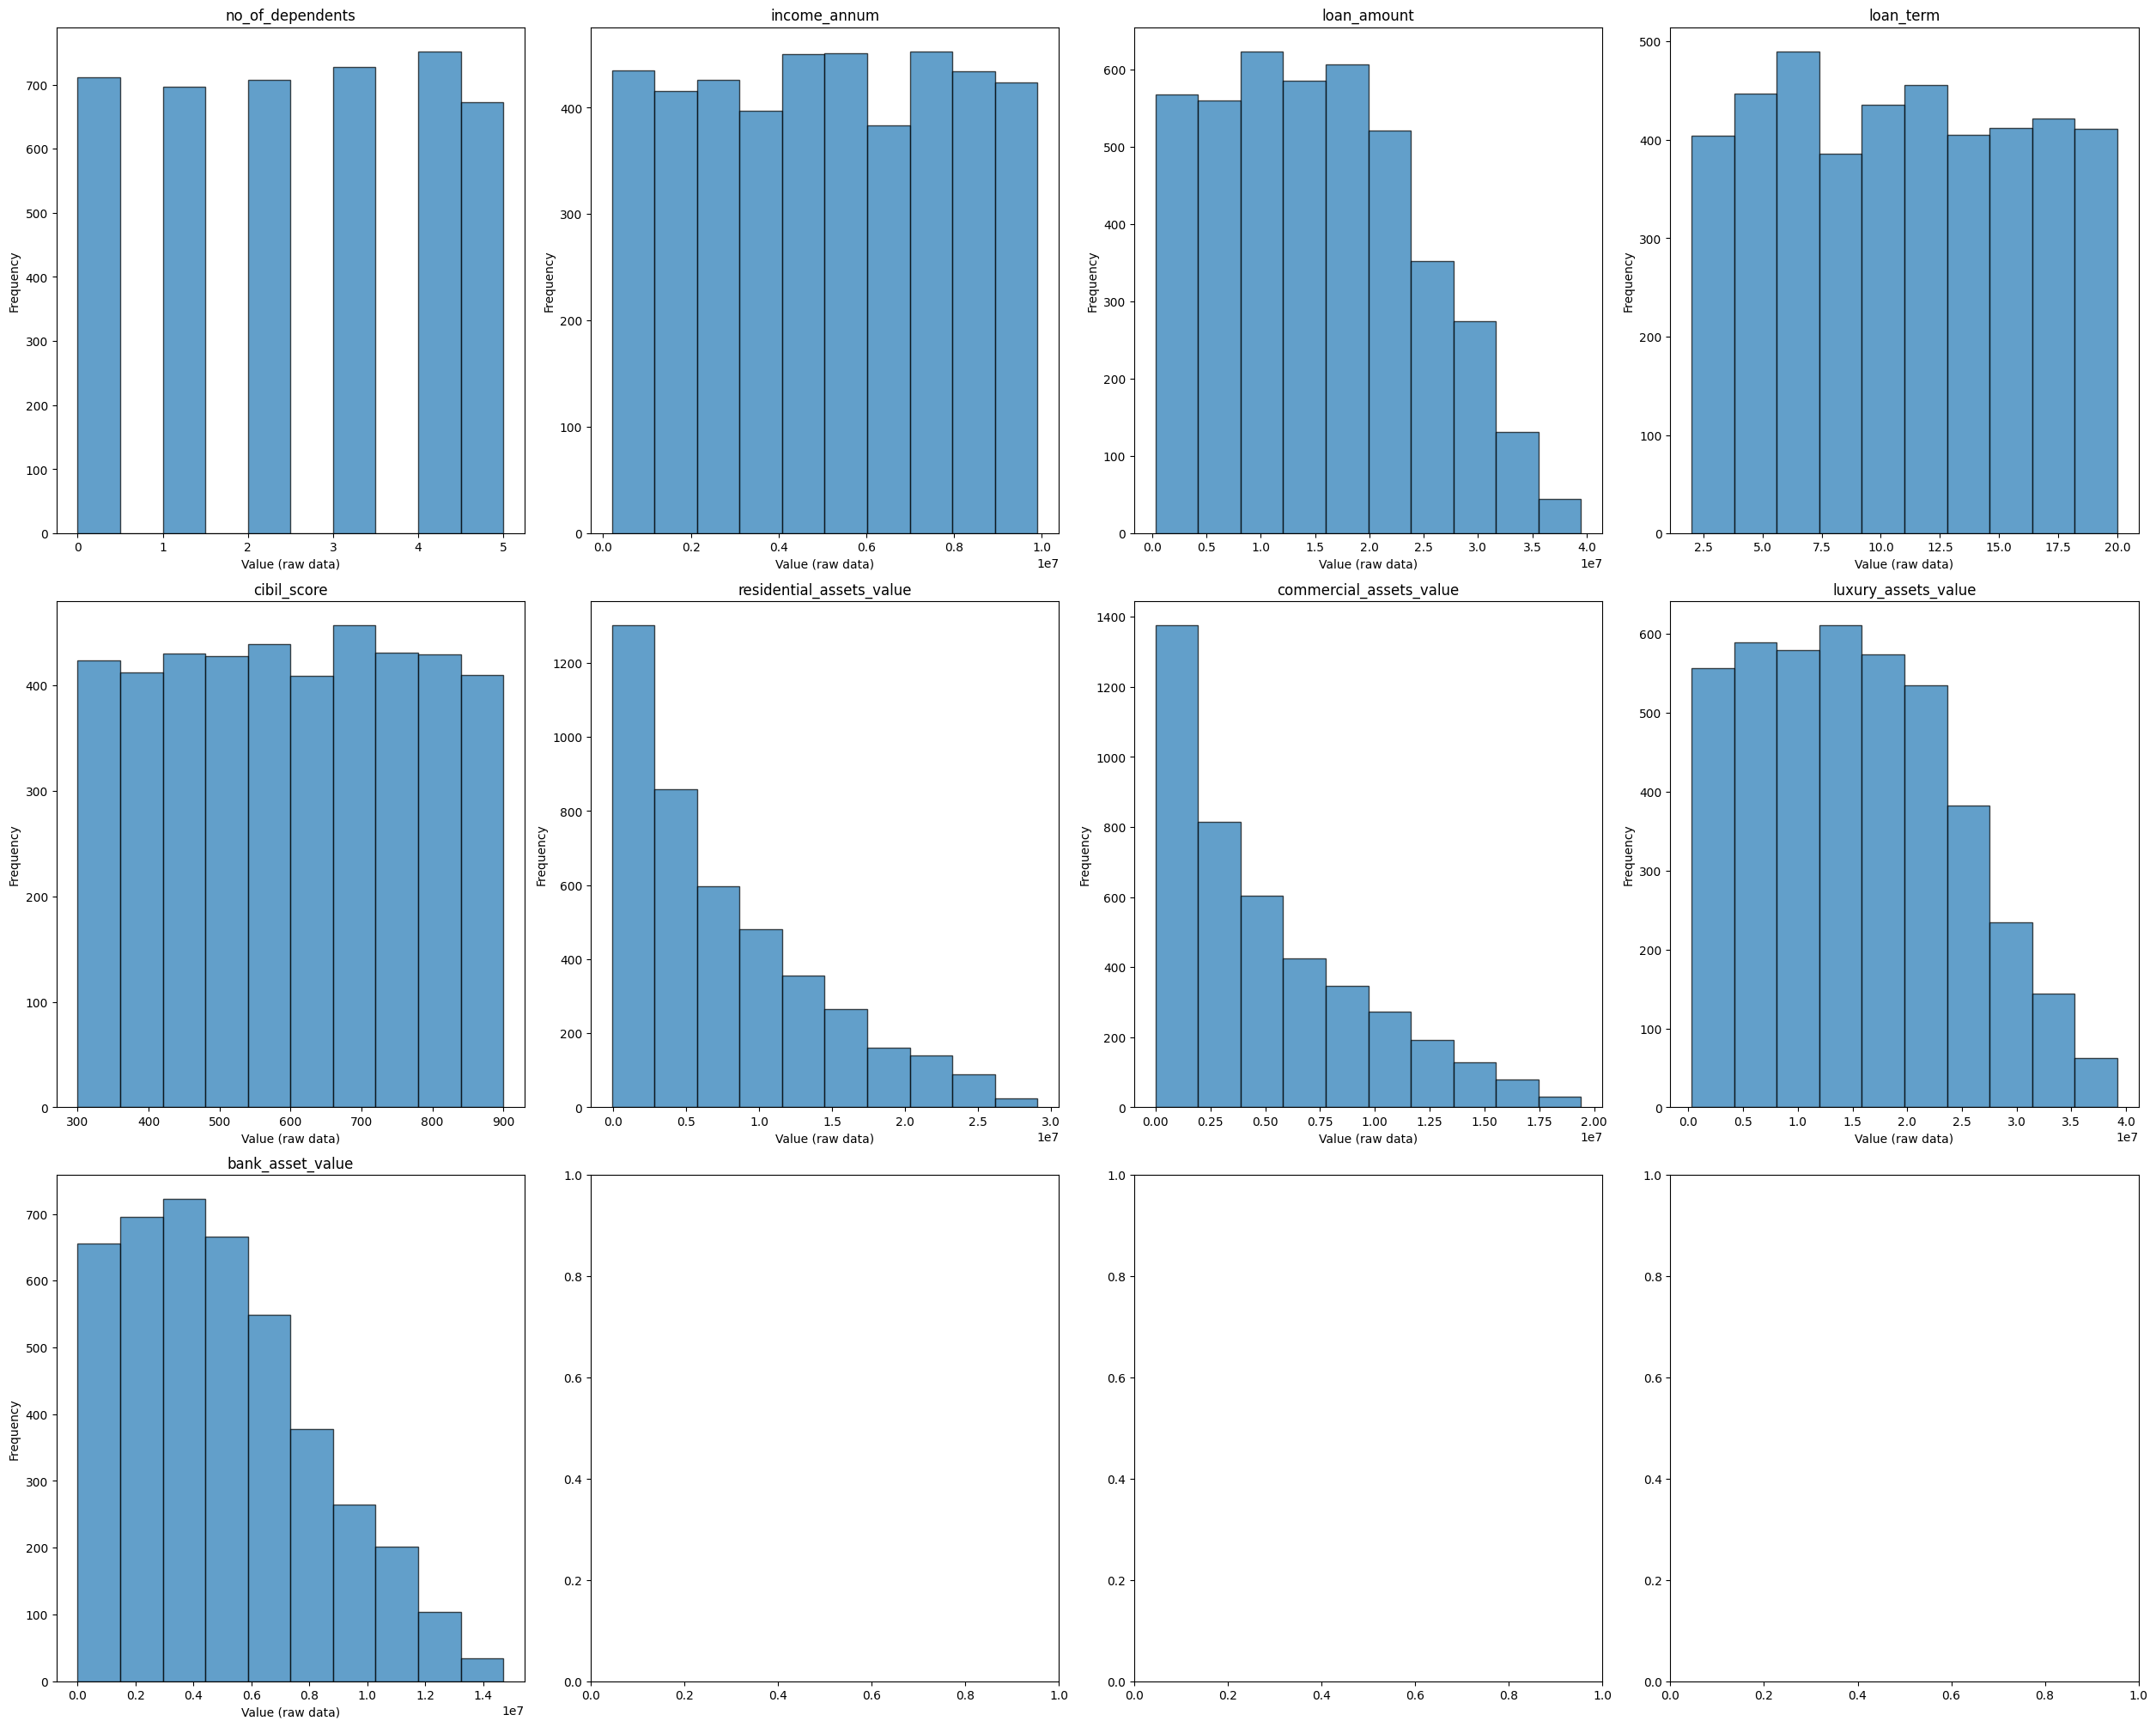

In [51]:
# Create subplot for numeric columns
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(25, 20), constrained_layout=True)
axes = axes.flatten()

for i, col in enumerate(df_loan_numcol.columns):
    # Create histograms for every column
    axes[i].hist(df_loan_numcol[col], alpha=0.7, edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_xlabel("Value (raw data)")
    axes[i].set_ylabel("Frequency")

# Show the figure
plt.show()


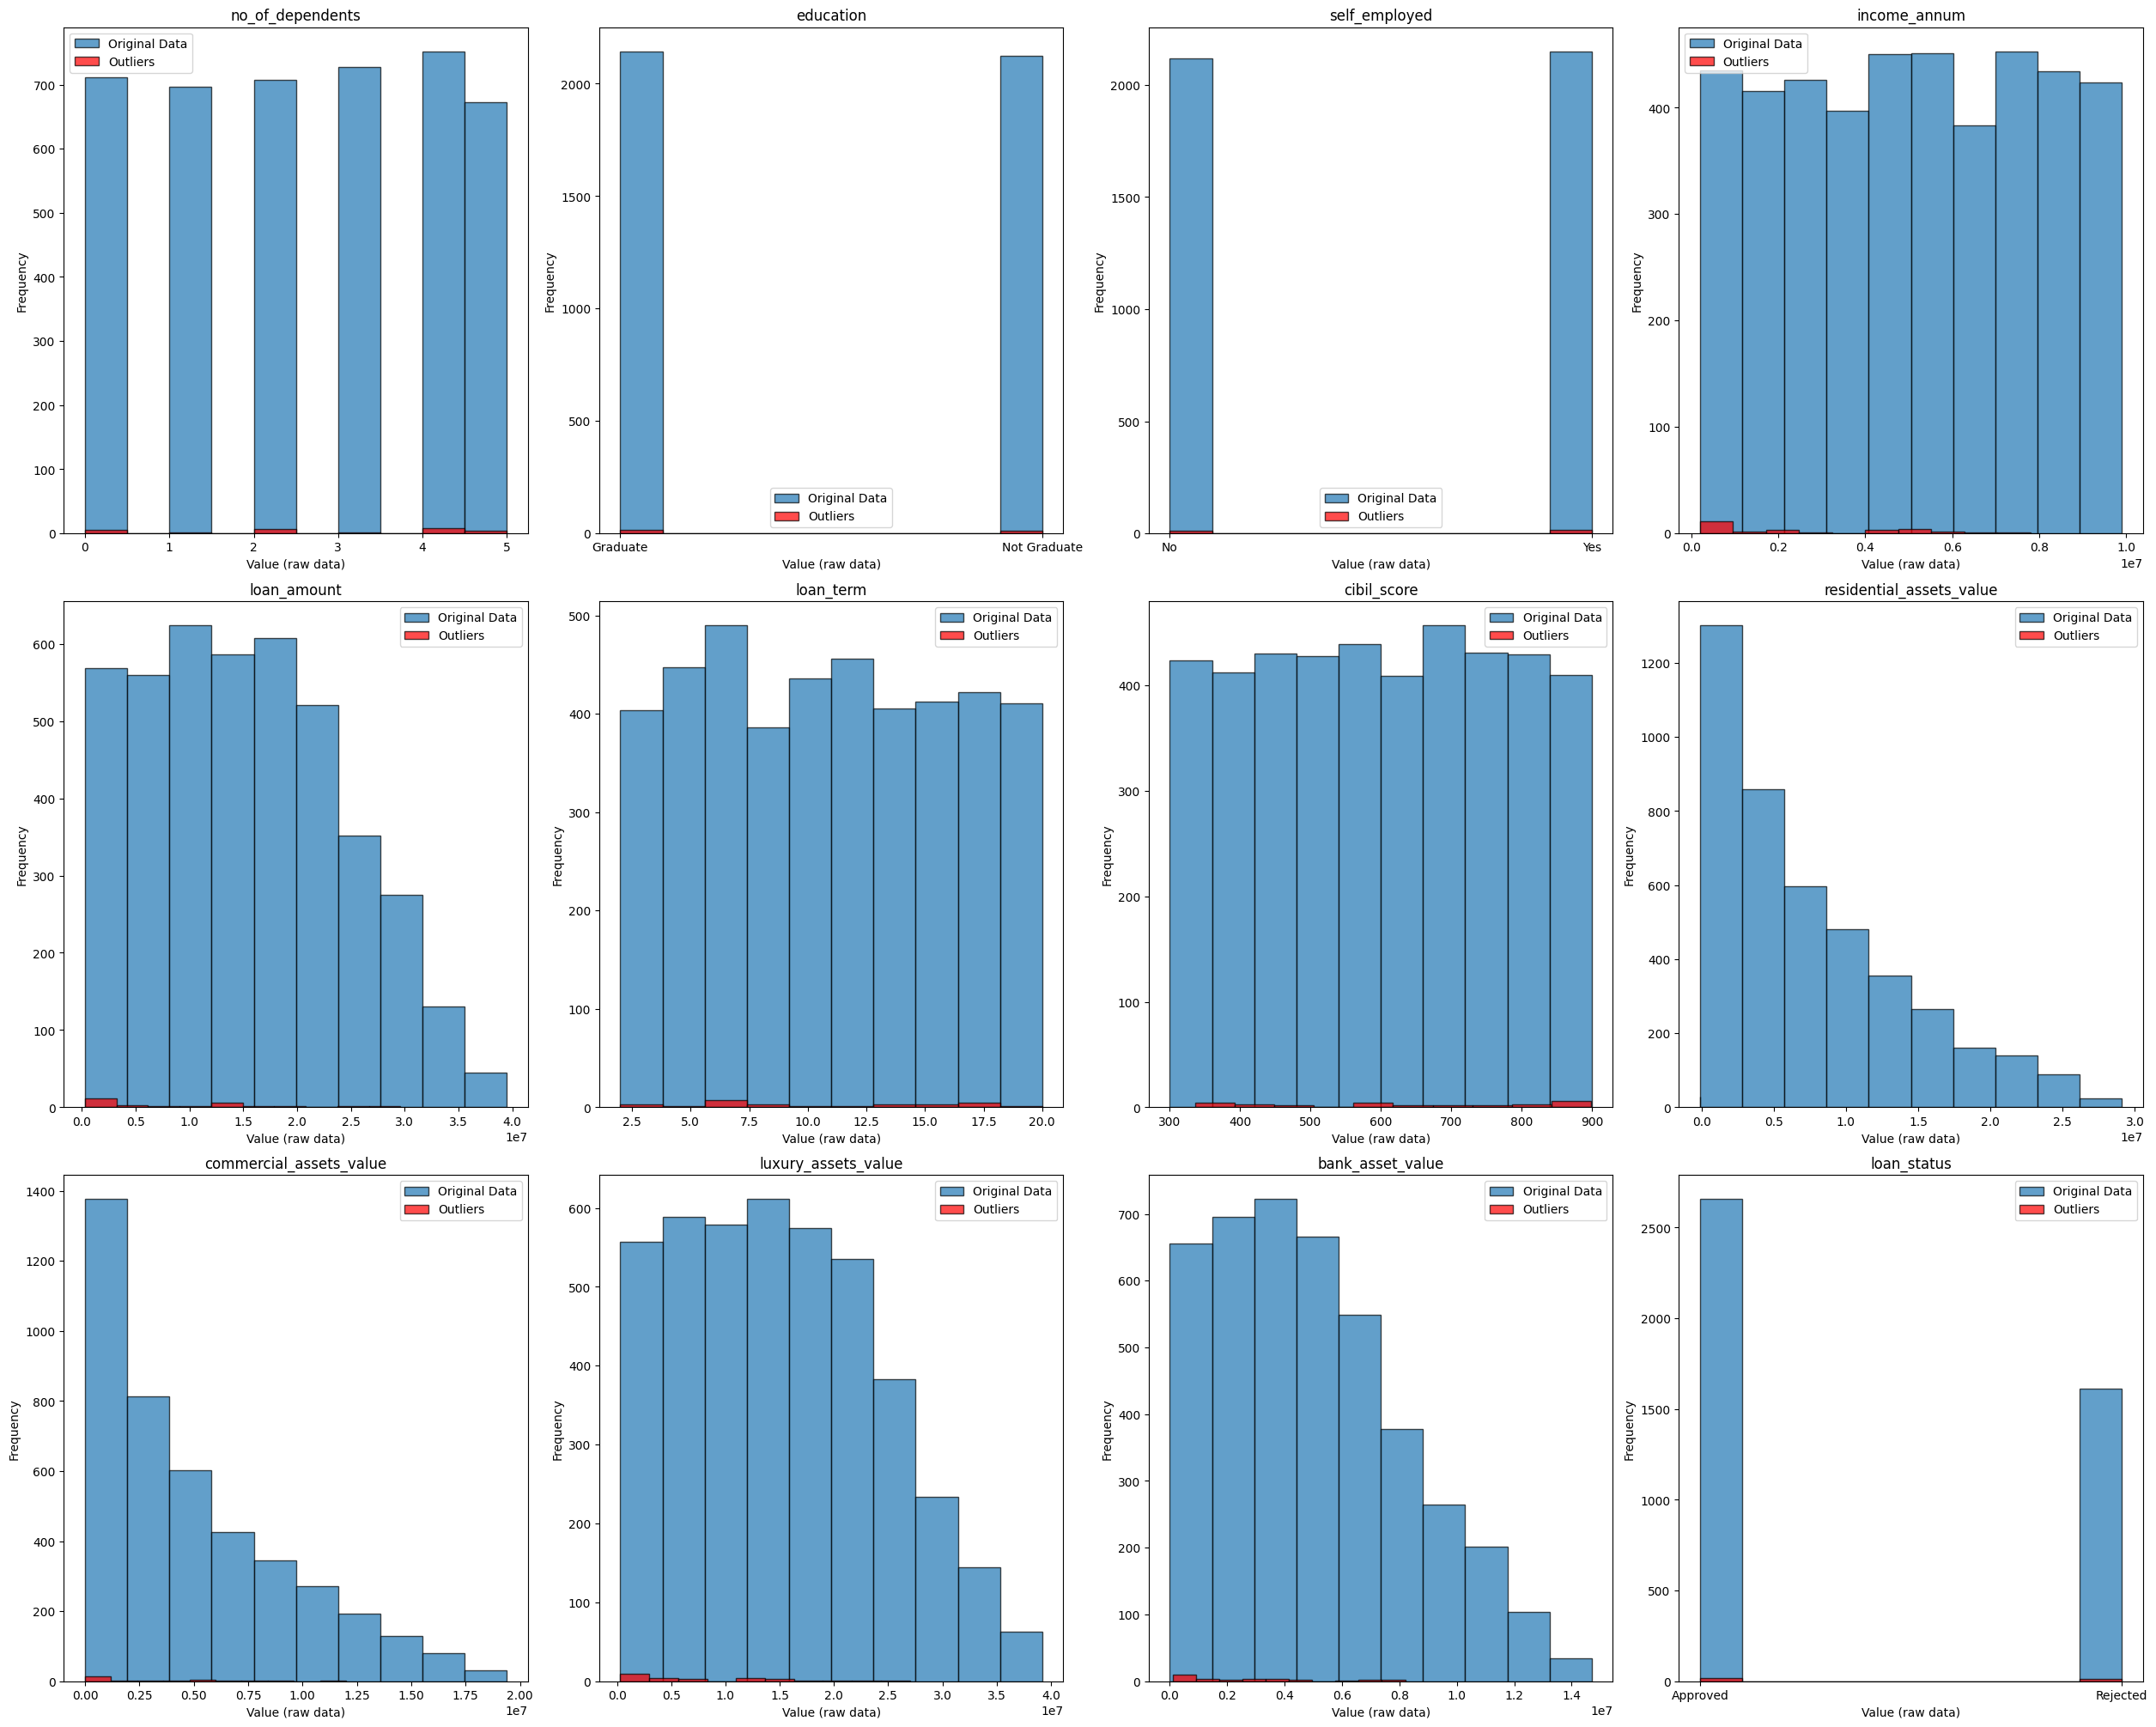

In [52]:
df_test_residential_negative_value = df_loan[df_loan['residential_assets_value'] < 0].drop(["loan_id"], axis=1)

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(25, 20), constrained_layout=True)
axes = axes.flatten()

for i, col in enumerate(df_test_residential_negative_value.columns):
    # Create histograms for every column (original data)
    axes[i].hist(df_loan[col], alpha=0.7, edgecolor='black', label='Original Data')

    # Overlay histogram for negative values in red
    axes[i].hist(df_test_residential_negative_value[col], alpha=0.7, color='red', edgecolor='black', label='Outliers')

    axes[i].set_title(col)
    axes[i].set_xlabel("Value (raw data)")
    axes[i].set_ylabel("Frequency")
    axes[i].legend()  # Add a legend to distinguish the two datasets

# Show the figure
plt.show()



**Explaination**:

The impact of the outliers (value of "residential_assets_value" < 0) on the dataset is minimal. Moreover, the value of -100000 in residential_assets_value could not be explained, so we assume these as some kind of input errors. Therefore, it is acceptable to remove this kind of outliers out of the dataset.

In [53]:
df_loan = df_loan[df_loan['residential_assets_value'] >= 0]

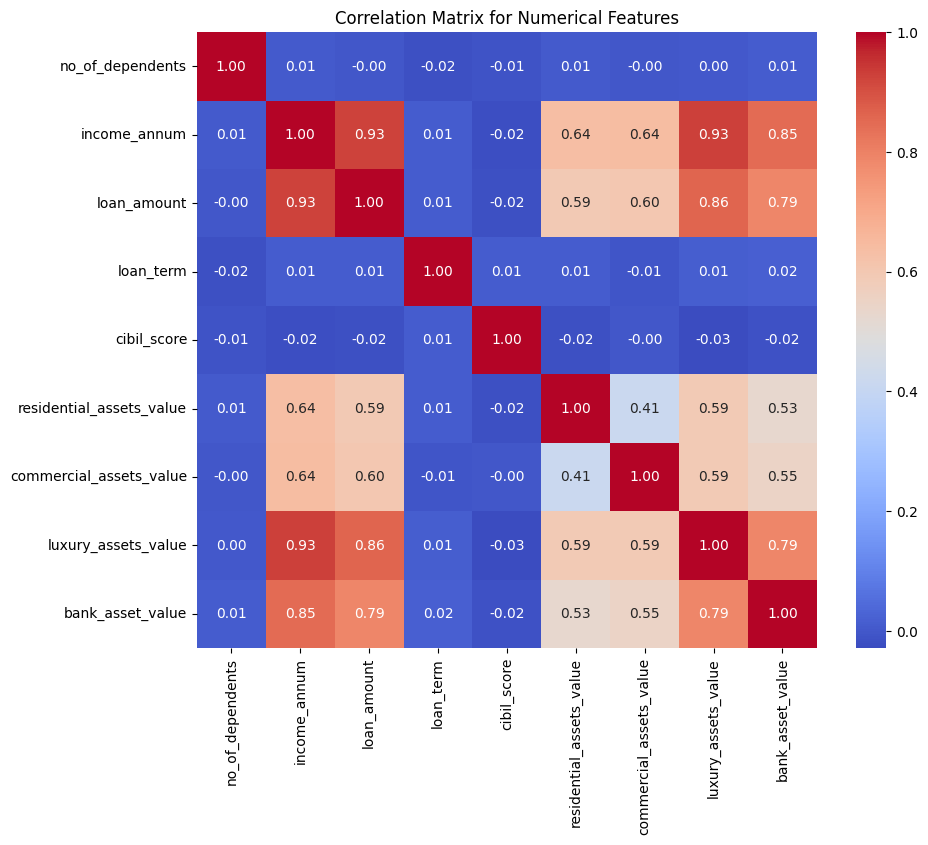

In [54]:
# Finding the correlation between numerical columns
corr_matrix_num = df_loan_numcol.corr()

# Display the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_num, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix for Numerical Features")
plt.show()

## Categorical Data Encoding

In [69]:
df_loan_catecol.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4269 entries, 1 to 4269
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   education      4269 non-null   object
 1   self_employed  4269 non-null   object
 2   loan_status    4269 non-null   object
dtypes: object(3)
memory usage: 133.4+ KB


In [70]:
# Encoding the categorical data using one-hot encoder
df_loan_catecol_encoded = (pd.get_dummies(df_loan_catecol))*1
df_loan_catecol_encoded.head()

,education_Graduate,education_Not Graduate,self_employed_No,self_employed_Yes,loan_status_Approved,loan_status_Rejected
loan_id,,,,,,
1,1,0,1,0,1,0
2,0,1,0,1,0,1
3,1,0,1,0,0,1
4,1,0,1,0,0,1
5,0,1,0,1,0,1


In [107]:
df_loan_new = pd.concat([df_loan_numcol, df_loan_catecol_encoded], axis=1).drop(["loan_status_Rejected", "self_employed_No", "education_Not Graduate" ], axis=1)
df_loan_new.head()
df_loan_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4269 entries, 1 to 4269
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   no_of_dependents          4269 non-null   int64
 1   income_annum              4269 non-null   int64
 2   loan_amount               4269 non-null   int64
 3   loan_term                 4269 non-null   int64
 4   cibil_score               4269 non-null   int64
 5   residential_assets_value  4269 non-null   int64
 6   commercial_assets_value   4269 non-null   int64
 7   luxury_assets_value       4269 non-null   int64
 8   bank_asset_value          4269 non-null   int64
 9   education_Graduate        4269 non-null   int64
 10  self_employed_Yes         4269 non-null   int64
 11  loan_status_Approved      4269 non-null   int64
dtypes: int64(12)
memory usage: 433.6 KB


In [ ]:
# Save the data used as input in the EDA process
save_eda = df_loan_new.to_csv("df_loan_new.csv")

# Feature Engineering

## Multicollinearity Detecting

Based on the correlation matrix above, there might be some potential of dependencies between the independent variables. VIF is applied to further inspect the multicollinearity of the independent variables.

In [108]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
df_corr = df_loan_new.copy()
formula_ver2 = 'loan_status_Approved ~ no_of_dependents + income_annum + loan_amount + loan_term + \
       cibil_score + education_Graduate + self_employed_Yes + \
       income_annum + loan_amount + loan_term + residential_assets_value +\
       commercial_assets_value + luxury_assets_value + bank_asset_value'
y, X = dmatrices(formula_ver2, df_loan_new, return_type='dataframe')

vif_original_data = pd.DataFrame()
vif_original_data["feature"] = X.columns
vif_original_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF DataFrame
print(vif_original_data)

                     feature        VIF
0                  Intercept  24.566300
1           no_of_dependents   1.001580
2               income_annum  17.651428
3                loan_amount   7.168658
4                  loan_term   1.001250
5                cibil_score   1.001532
6         education_Graduate   1.001185
7          self_employed_Yes   1.001337
8   residential_assets_value   1.685239
9    commercial_assets_value   1.700015
10       luxury_assets_value   7.322618
11          bank_asset_value   3.634924


Comment: income_annum, loan_amount, luxury_assets_value and bank_asset_value might need to be processed.

## Multicollinearity Handling: loan_amount & income_annum

In [109]:
# Creating "debt to income" columns to combine loan amount and annual income, which solve the co-dependencies of these two columns & keep their information

df_loan_new['debt_to_income'] = (df_loan_new['loan_amount']/(df_loan_new['loan_term']))/(df_loan_new['income_annum']/12)
df_loan_new_ver2 = df_loan_new.copy()
df_loan_new_ver2.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_Graduate,self_employed_Yes,loan_status_Approved,debt_to_income
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4269.000000,4269.000000
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06,0.502225,0.503631,0.622160,5.226159
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06,0.500054,0.500045,0.484904,4.786546
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00,0.000000,0.000000,0.000000,0.900000
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06,0.000000,0.000000,0.000000,2.250000
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06,1.000000,1.000000,1.000000,3.302108
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06,1.000000,1.000000,1.000000,6.068966
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07,1.000000,1.000000,1.000000,24.000000


In [110]:
df_loan_new_ver2 = df_loan_new_ver2.drop(columns=['loan_amount', 'loan_term', 'income_annum'], axis=1)
df_loan_new_ver2_corr_test = df_loan_new_ver2.corr()
df_loan_new_ver2_corr_test

,no_of_dependents,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_Graduate,self_employed_Yes,loan_status_Approved,debt_to_income
no_of_dependents,1.000000,-0.009998,0.007376,-0.001531,0.002817,0.011163,0.002697,0.000765,-0.018114,0.006366
cibil_score,-0.009998,1.000000,-0.019947,-0.003769,-0.028618,-0.015478,-0.004649,-0.004866,0.770518,-0.004969
residential_assets_value,0.007376,-0.019947,1.000000,0.414786,0.590932,0.527418,0.010930,0.006144,-0.014367,-0.014898
commercial_assets_value,-0.001531,-0.003769,0.414786,1.000000,0.591128,0.548576,-0.006763,-0.017998,0.008246,0.002258
luxury_assets_value,0.002817,-0.028618,0.590932,0.591128,1.000000,0.788517,0.012471,0.004413,-0.015465,-0.012899
bank_asset_value,0.011163,-0.015478,0.527418,0.548576,0.788517,1.000000,0.009424,-0.000215,-0.006778,-0.014025
education_Graduate,0.002697,-0.004649,0.010930,-0.006763,0.012471,0.009424,1.000000,-0.023224,0.004918,0.004083
self_employed_Yes,0.000765,-0.004866,0.006144,-0.017998,0.004413,-0.000215,-0.023224,1.000000,0.000345,-0.005656
loan_status_Approved,-0.018114,0.770518,-0.014367,0.008246,-0.015465,-0.006778,0.004918,0.000345,1.000000,0.183053
debt_to_income,0.006366,-0.004969,-0.014898,0.002258,-0.012899,-0.014025,0.004083,-0.005656,0.183053,1.000000


## Multicollinearity Handling: assets columns & Data Standardization

Comments: In order to use VIF to decrease the dimensions of the dataset and solve the multicollinearity of all the assets columns, data standardization needs to be applied first to the aforementioned columns. Further standardization for other numerical features are because of the ranges of data within the columns which could lead to skewness and deviations of the predictive models.

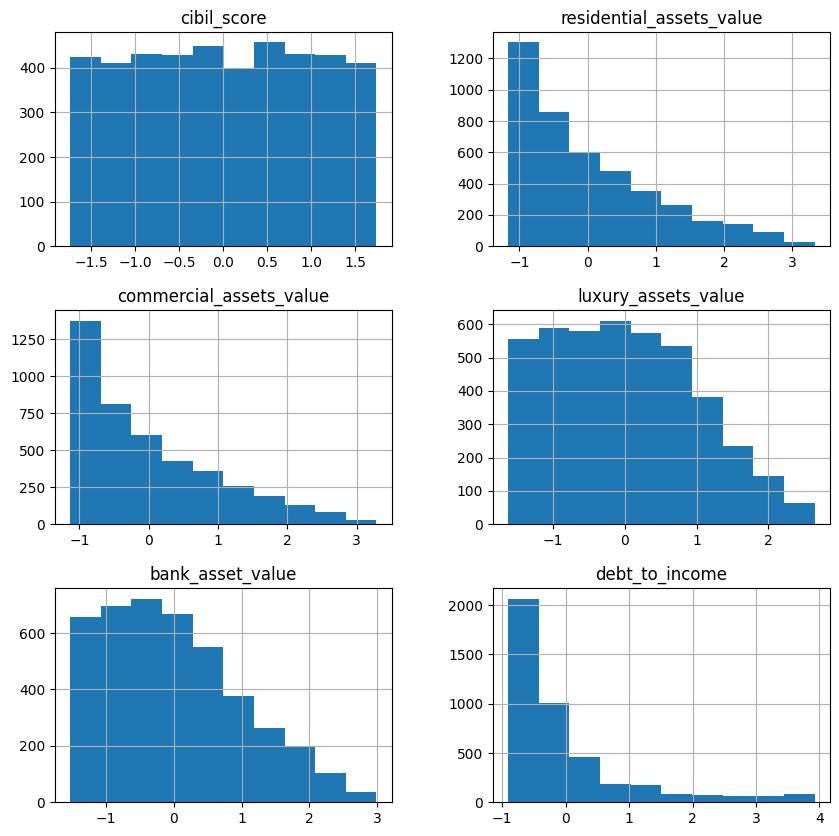

In [111]:
stdize = StandardScaler()
num_col = [
    'cibil_score', 'residential_assets_value', 'commercial_assets_value',
    'luxury_assets_value', 'bank_asset_value', 'debt_to_income'
]
# Standardize the numerical columns
df_loan_ver2_standardized = df_loan_new_ver2.copy()
df_loan_ver2_standardized[num_col] = stdize.fit_transform(df_loan_new_ver2[num_col])
df_loan_ver2_standardized[num_col].hist(figsize=(10, 10))
plt.show()


In [112]:
# Select the asset value columns
asset_ver2_columns = ['residential_assets_value', 'commercial_assets_value',
                 'luxury_assets_value', 'bank_asset_value']
asset_ver2_data = df_loan_ver2_standardized[asset_ver2_columns]

# Apply PCA directly (data is already standardized)
pca = PCA(n_components=1)
principal_component_ver2 = pca.fit_transform(asset_ver2_data)

# Create a new column with the principal component
df_loan_ver2_standardized['asset_combined'] = principal_component_ver2

# Drop the original asset columns
df_loan_ver2_standardized = df_loan_ver2_standardized.drop(columns=asset_ver2_columns)
df_loan_ver2_standardized.describe()

,no_of_dependents,cibil_score,education_Graduate,self_employed_Yes,loan_status_Approved,debt_to_income,asset_combined
count,4269.000000,4.269000e+03,4269.000000,4269.000000,4269.000000,4.269000e+03,4.269000e+03
mean,2.498712,2.629790e-16,0.502225,0.503631,0.622160,-7.406688e-17,2.330194e-17
std,1.695910,1.000117e+00,0.500054,0.500045,0.484904,1.000117e+00,1.657460e+00
min,0.000000,-1.739665e+00,0.000000,0.000000,0.000000,-9.039223e-01,-2.732132e+00
25%,1.000000,-8.522468e-01,0.000000,0.000000,0.000000,-6.218488e-01,-1.377860e+00
50%,3.000000,3.709143e-04,1.000000,1.000000,1.000000,-4.020179e-01,-1.045016e-01
75%,4.000000,8.587888e-01,1.000000,1.000000,1.000000,1.760987e-01,1.211692e+00
max,5.000000,1.740407e+00,1.000000,1.000000,1.000000,3.922670e+00,4.649790e+00


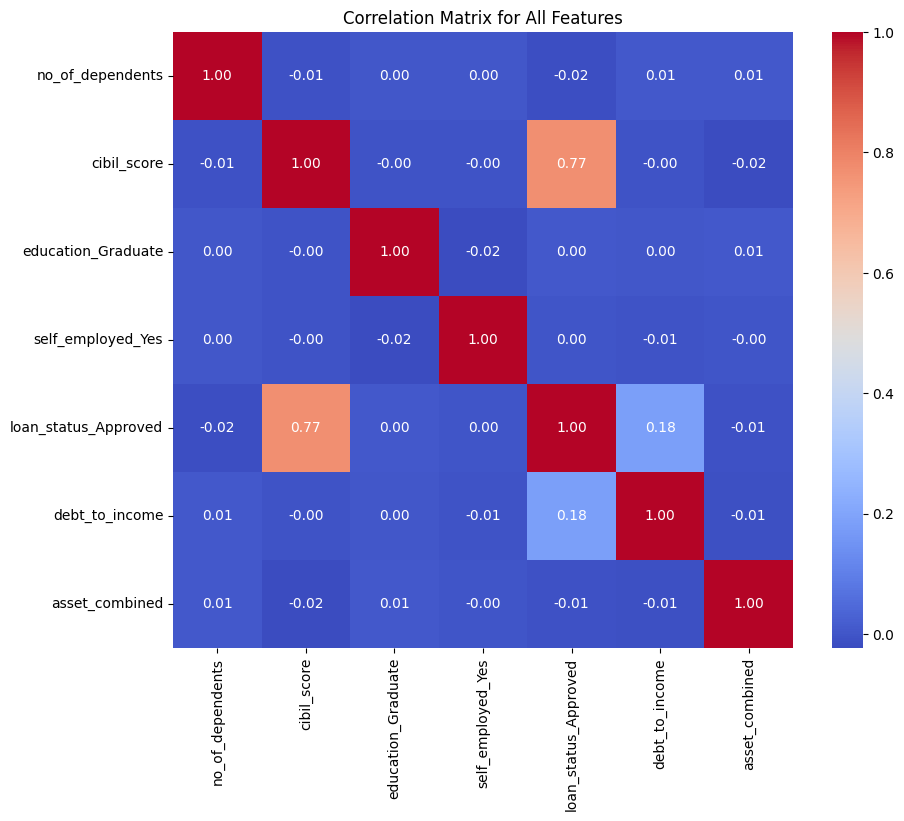

In [113]:
# Correlation of data after standardization
# Find the correlation with the categorical data included
df_test_ver2_std_corr = df_loan_ver2_standardized.corr()

# Display the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df_test_ver2_std_corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True) #, mask=mask)
plt.title("Correlation Matrix for All Features")
plt.show()

In [114]:
df_test_ver2 = df_loan_ver2_standardized.copy()
formula_ver2 = 'loan_status_Approved ~ no_of_dependents +  \
       cibil_score + education_Graduate + self_employed_Yes + \
       debt_to_income + asset_combined'
y, X = dmatrices(formula_ver2, df_loan_ver2_standardized, return_type='dataframe')

# Compute Variance Inflation Factor
vif_data_ver2 = pd.DataFrame()
vif_data_ver2["feature"] = X.columns
vif_data_ver2["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF
print(vif_data_ver2)

              feature       VIF
0           Intercept  5.233438
1    no_of_dependents  1.000183
2         cibil_score  1.000608
3  education_Graduate  1.000651
4   self_employed_Yes  1.000600
5      debt_to_income  1.000266
6      asset_combined  1.000697


Comments: Multicollinearity has been solved. Now data are ready to be put into the model.

In [115]:
# Saving the final data used as input in the predictive models
save_ml = df_test_ver2.to_csv("loan_standardized_with_debt_to_income.csv")